# 3. Polynomial Regression
공부 시간에 따른 시험 점수(우등생)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('PolynomialRegressionData.csv')

dataset.head()

,hour,score
0,0.2,2
1,0.5,4
2,0.8,6
3,0.9,4
4,1.2,6


In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## 3-1. Simple Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

### 데이터 시각화(전체)

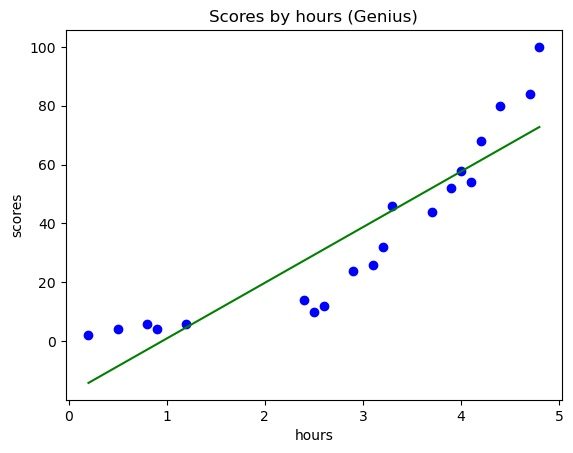

In [8]:
plt.scatter(X, y, color='b')
plt.plot(X, lr.predict(X), c='g')
plt.xlabel('hours')
plt.ylabel('scores')
plt.title('Scores by hours (Genius)')
plt.show()

In [9]:
lr.score(X, y) # 전체 데이터를 통한 모델 평가

0.8169296513411765

## 3-2. Polynomial Regression

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=4) # 2차
X_poly = poly_reg.fit_transform(X)
X_poly[:5] # [x] -> [x^0, x^1, x^2]

array([[1.0000e+00, 2.0000e-01, 4.0000e-02, 8.0000e-03, 1.6000e-03],
       [1.0000e+00, 5.0000e-01, 2.5000e-01, 1.2500e-01, 6.2500e-02],
       [1.0000e+00, 8.0000e-01, 6.4000e-01, 5.1200e-01, 4.0960e-01],
       [1.0000e+00, 9.0000e-01, 8.1000e-01, 7.2900e-01, 6.5610e-01],
       [1.0000e+00, 1.2000e+00, 1.4400e+00, 1.7280e+00, 2.0736e+00]])

In [12]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [13]:
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

In [14]:
lr.fit(X_poly, y) # 다항 x 와 y를 통해 모델 생성 (학습)

LinearRegression()

### 데이터 시각화 (다항 x와 y)

In [16]:
X_range = np.arange(min(X), max(X), 0.1)
X_range.shape

C:\Users\user\AppData\Local\Temp\ipykernel_22760\2246470542.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_range = np.arange(min(X), max(X), 0.1)


(46,)

In [17]:
X_range = X_range.reshape(-1, 1) # row 개수는 자동으로 계산, column 개수는 1개

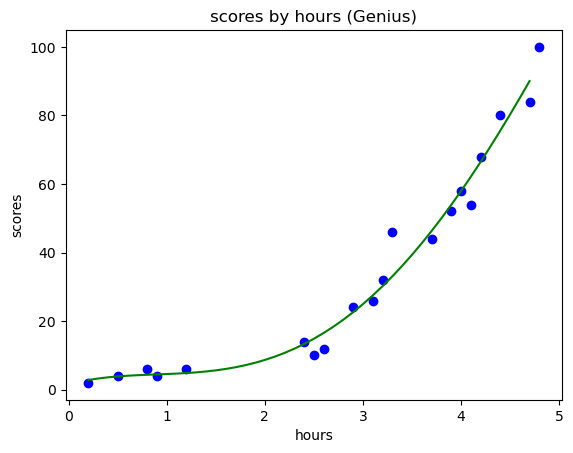

In [18]:
plt.scatter(X, y, c='b')
plt.plot(X_range, lr.predict(poly_reg.fit_transform(X_range)), c='g')
plt.xlabel('hours')
plt.ylabel('scores')
plt.title('scores by hours (Genius)')
plt.show()

### 공부시간에 따른 시험 성적 예측

In [20]:
lr.predict(poly_reg.fit_transform([[2]])) # 2시간 공부했을 떄 다항회귀 모델의 예측

array([8.70559135])

In [21]:
lr.score(X_poly, y)

0.9782775579000046